In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
# Importing the necessary files
df = pd.read_csv("Data/flights_cleaned.csv")

In [39]:
df.head(15)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,NaN,0,235.0,236,189,1399,0.0,0.0,0.0,0.0,0.0,0
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,NaN,0,118.0,112,87,680,0.0,0.0,0.0,0.0,0.0,0
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,NaN,0,260.0,285,249,1589,0.0,0.0,24.0,0.0,0.0,1
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0,NaN,0,109.0,89,58,399,0.0,0.0,0.0,0.0,0.0,0
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0,NaN,0,227.0,219,200,1379,0.0,0.0,0.0,0.0,0.0,0
5,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011,BWI,"Baltimore, MD",BDL,"Hartford, CT",1735,1738.0,3.0,12.0,1750.0,1843.0,3.0,1840,1846.0,6.0,0,NaN,0,65.0,68,53,283,0.0,0.0,0.0,0.0,0.0,0
6,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",803,800.0,-3.0,17.0,817.0,943.0,3.0,1012,946.0,-26.0,0,NaN,0,129.0,106,86,636,0.0,0.0,0.0,0.0,0.0,0
7,2022-11-12,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2706,GRR,"Grand Rapids, MI",MSP,"Minneapolis, MN",730,720.0,-10.0,10.0,730.0,731.0,5.0,806,736.0,-30.0,0,NaN,0,96.0,76,61,408,0.0,0.0,0.0,0.0,0.0,0
8,2022-09-06,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1754,DFW,"Dallas/Fort Worth, TX",PNS,"Pensacola, FL",830,830.0,0.0,19.0,849.0,1016.0,4.0,1014,1020.0,6.0,0,NaN,0,104.0,110,87,604,0.0,0.0,0.0,0.0,0.0,0
9,2022-03-06,JetBlue Airways,JetBlue Airways: B6,B6,20409,406,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",2030,2030.0,0.0,14.0,2044.0,2309.0,11.0,2328,2320.0,-8.0,0,NaN,0,178.0,170,145,1065,0.0,0.0,0.0,0.0,0.0,0


In [40]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(1151343, 33)

|Field|Data Type|Description|Type of Variable|Variable Category|
|-|-|-|-|-|
|year|Integer|2013|-|Ordinal|
|month|Integer|Jan = 1|-|Ordinal|
|day|Integer|1,2,3,..,31|Ordinal|
|dep_time|Integer|Military Time (1:00 PM  = 1300)|Predictor|Continuous|
|UniqueCarrier|String|Airline Carrier Code|Predictor|Categorical|
|ScheduledElapsedTime|Integer|Scheduled flight time in minutes|Predictor|Continuous|
|ArrDelay|Integer|Arrival delay in minutes||Continuous|
|DepDelay|Integer|Departure delay in minutes||Continuous|
|Distance|Integer|Distance in miles|Predictor|Continuous|

In [41]:
# Now checking whther the dataset contains the NULL values or not.
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        0
TAXI_IN                          0
CRS_ARR_TIME                     0
ARR_TIME                         0
ARR_DELAY                        0
CANCELLED                        0
CANCELLATION_CODE          1125087
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER   

There are null values in `dep_time`, `dep_delay`, `arr_time`, `arr_delay`. We have to remove them.

In [42]:
# Dropping the rows that have NaN i.e. NULL values in them
# df = df.dropna()

In [43]:
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,NaN,0,235.0,236,189,1399,0.0,0.0,0.0,0.0,0.0,0
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,NaN,0,118.0,112,87,680,0.0,0.0,0.0,0.0,0.0,0
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,NaN,0,260.0,285,249,1589,0.0,0.0,24.0,0.0,0.0,1
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0,NaN,0,109.0,89,58,399,0.0,0.0,0.0,0.0,0.0,0
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0,NaN,0,227.0,219,200,1379,0.0,0.0,0.0,0.0,0.0,0
5,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011,BWI,"Baltimore, MD",BDL,"Hartford, CT",1735,1738.0,3.0,12.0,1750.0,1843.0,3.0,1840,1846.0,6.0,0,NaN,0,65.0,68,53,283,0.0,0.0,0.0,0.0,0.0,0
6,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",803,800.0,-3.0,17.0,817.0,943.0,3.0,1012,946.0,-26.0,0,NaN,0,129.0,106,86,636,0.0,0.0,0.0,0.0,0.0,0
7,2022-11-12,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2706,GRR,"Grand Rapids, MI",MSP,"Minneapolis, MN",730,720.0,-10.0,10.0,730.0,731.0,5.0,806,736.0,-30.0,0,NaN,0,96.0,76,61,408,0.0,0.0,0.0,0.0,0.0,0
8,2022-09-06,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1754,DFW,"Dallas/Fort Worth, TX",PNS,"Pensacola, FL",830,830.0,0.0,19.0,849.0,1016.0,4.0,1014,1020.0,6.0,0,NaN,0,104.0,110,87,604,0.0,0.0,0.0,0.0,0.0,0
9,2022-03-06,JetBlue Airways,JetBlue Airways: B6,B6,20409,406,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",2030,2030.0,0.0,14.0,2044.0,2309.0,11.0,2328,2320.0,-8.0,0,NaN,0,178.0,170,145,1065,0.0,0.0,0.0,0.0,0.0,0


In [44]:
df.tail(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED
1151333,2022-10-13,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,731,SEA,"Seattle, WA",SFO,"San Francisco, CA",1335,1330.0,-5.0,20.0,1350.0,1527.0,5.0,1543,1532.0,-11.0,0,NaN,0,128.0,122,97,679,0.0,0.0,0.0,0.0,0.0,0
1151334,2023-03-13,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3197,OAK,"Oakland, CA",LAS,"Las Vegas, NV",800,758.0,-2.0,13.0,811.0,911.0,4.0,935,915.0,-20.0,0,NaN,0,95.0,77,60,407,0.0,0.0,0.0,0.0,0.0,0
1151335,2023-04-23,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1208,ORD,"Chicago, IL",DTW,"Detroit, MI",1030,1026.0,-4.0,8.0,1034.0,1219.0,7.0,1254,1226.0,-28.0,0,NaN,0,84.0,60,45,235,0.0,0.0,0.0,0.0,0.0,0
1151336,2023-01-03,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1456,SLC,"Salt Lake City, UT",DFW,"Dallas/Fort Worth, TX",1619,1639.0,20.0,12.0,1651.0,1956.0,18.0,1953,2014.0,21.0,0,NaN,0,154.0,155,125,989,0.0,0.0,1.0,0.0,20.0,1
1151337,2022-02-09,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2841,ATL,"Atlanta, GA",EWR,"Newark, NJ",815,806.0,-9.0,15.0,821.0,954.0,7.0,1019,1001.0,-18.0,0,NaN,0,124.0,115,93,746,0.0,0.0,0.0,0.0,0.0,0
1151338,2023-05-29,Republic Airline,Republic Airline: YX,YX,20452,4644,PWM,"Portland, ME",DCA,"Washington, DC",550,550.0,0.0,8.0,558.0,718.0,15.0,747,733.0,-14.0,0,NaN,0,117.0,103,80,482,0.0,0.0,0.0,0.0,0.0,0
1151339,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0,NaN,0,78.0,92,55,311,0.0,0.0,0.0,0.0,0.0,0
1151340,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0,NaN,0,85.0,71,55,328,0.0,0.0,0.0,0.0,0.0,0
1151341,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0,NaN,0,176.0,145,130,977,0.0,0.0,0.0,0.0,0.0,0
1151342,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0,NaN,0,55.0,50,28,151,0.0,36.0,0.0,0.0,0.0,1


In [45]:
# Dimension after dropping the rows containing NULL values
df.shape

(1151343, 33)

In [46]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        0
TAXI_IN                          0
CRS_ARR_TIME                     0
ARR_TIME                         0
ARR_DELAY                        0
CANCELLED                        0
CANCELLATION_CODE          1125087
DIVERTED                         0
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER   

In [47]:
# Before type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151343 entries, 0 to 1151342
Data columns (total 33 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1151343 non-null  object 
 1   AIRLINE                  1151343 non-null  object 
 2   AIRLINE_DOT              1151343 non-null  object 
 3   AIRLINE_CODE             1151343 non-null  object 
 4   DOT_CODE                 1151343 non-null  int64  
 5   FL_NUMBER                1151343 non-null  int64  
 6   ORIGIN                   1151343 non-null  object 
 7   ORIGIN_CITY              1151343 non-null  object 
 8   DEST                     1151343 non-null  object 
 9   DEST_CITY                1151343 non-null  object 
 10  CRS_DEP_TIME             1151343 non-null  int64  
 11  DEP_TIME                 1151343 non-null  float64
 12  DEP_DELAY                1151343 non-null  float64
 13  TAXI_OUT                 1151343 non-null 

In [48]:
# Type casting
df['dep_time'] = df['DEP_TIME'].astype('int64')
df['dep_delay'] = df['DEP_DELAY'].astype('int64')
df['arr_time'] = df['ARR_TIME'].astype('int64')
df['arr_delay'] = df['ARR_DELAY'].astype('int64')

In [49]:
# After type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151343 entries, 0 to 1151342
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1151343 non-null  object 
 1   AIRLINE                  1151343 non-null  object 
 2   AIRLINE_DOT              1151343 non-null  object 
 3   AIRLINE_CODE             1151343 non-null  object 
 4   DOT_CODE                 1151343 non-null  int64  
 5   FL_NUMBER                1151343 non-null  int64  
 6   ORIGIN                   1151343 non-null  object 
 7   ORIGIN_CITY              1151343 non-null  object 
 8   DEST                     1151343 non-null  object 
 9   DEST_CITY                1151343 non-null  object 
 10  CRS_DEP_TIME             1151343 non-null  int64  
 11  DEP_TIME                 1151343 non-null  float64
 12  DEP_DELAY                1151343 non-null  float64
 13  TAXI_OUT                 1151343 non-null 

In [50]:
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED,dep_time,dep_delay,arr_time,arr_delay
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,NaN,0,235.0,236,189,1399,0.0,0.0,0.0,0.0,0.0,0,2114,-6,2310,-5
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,NaN,0,118.0,112,87,680,0.0,0.0,0.0,0.0,0.0,0,1000,6,1252,0
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,NaN,0,260.0,285,249,1589,0.0,0.0,24.0,0.0,0.0,1,1608,-1,1853,24
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0,NaN,0,109.0,89,58,399,0.0,0.0,0.0,0.0,0.0,0,1001,-9,1130,-29
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0,NaN,0,227.0,219,200,1379,0.0,0.0,0.0,0.0,0.0,0,527,-3,706,-11
5,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011,BWI,"Baltimore, MD",BDL,"Hartford, CT",1735,1738.0,3.0,12.0,1750.0,1843.0,3.0,1840,1846.0,6.0,0,NaN,0,65.0,68,53,283,0.0,0.0,0.0,0.0,0.0,0,1738,3,1846,6
6,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",803,800.0,-3.0,17.0,817.0,943.0,3.0,1012,946.0,-26.0,0,NaN,0,129.0,106,86,636,0.0,0.0,0.0,0.0,0.0,0,800,-3,946,-26
7,2022-11-12,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2706,GRR,"Grand Rapids, MI",MSP,"Minneapolis, MN",730,720.0,-10.0,10.0,730.0,731.0,5.0,806,736.0,-30.0,0,NaN,0,96.0,76,61,408,0.0,0.0,0.0,0.0,0.0,0,720,-10,736,-30
8,2022-09-06,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1754,DFW,"Dallas/Fort Worth, TX",PNS,"Pensacola, FL",830,830.0,0.0,19.0,849.0,1016.0,4.0,1014,1020.0,6.0,0,NaN,0,104.0,110,87,604,0.0,0.0,0.0,0.0,0.0,0,830,0,1020,6
9,2022-03-06,JetBlue Airways,JetBlue Airways: B6,B6,20409,406,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",2030,2030.0,0.0,14.0,2044.0,2309.0,11.0,2328,2320.0,-8.0,0,NaN,0,178.0,170,145,1065,0.0,0.0,0.0,0.0,0.0,0,2030,0,2320,-8


## Exploratory Data Analysis

Let's check the number of flights per `month`

In [51]:
# Ensure date column is datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Extract features
df['year'] = df['FL_DATE'].dt.year
df['month'] = df['FL_DATE'].dt.month
df['day_of_week'] = df['FL_DATE'].dt.dayofweek   # 0=Mon, 6=Sun
df['day_name'] = df['FL_DATE'].dt.day_name()

In [52]:
# Create DELAYED column (adjust column name if different, e.g., DEP_DELAY or ARR_DELAY_NEW)
df['DELAYED'] = df['ARR_DELAY'].apply(lambda x: 1 if x >= 15 else 0)

# Check counts of delayed vs not delayed flights
print(df['DELAYED'].value_counts())

DELAYED
0    906216
1    245127
Name: count, dtype: int64


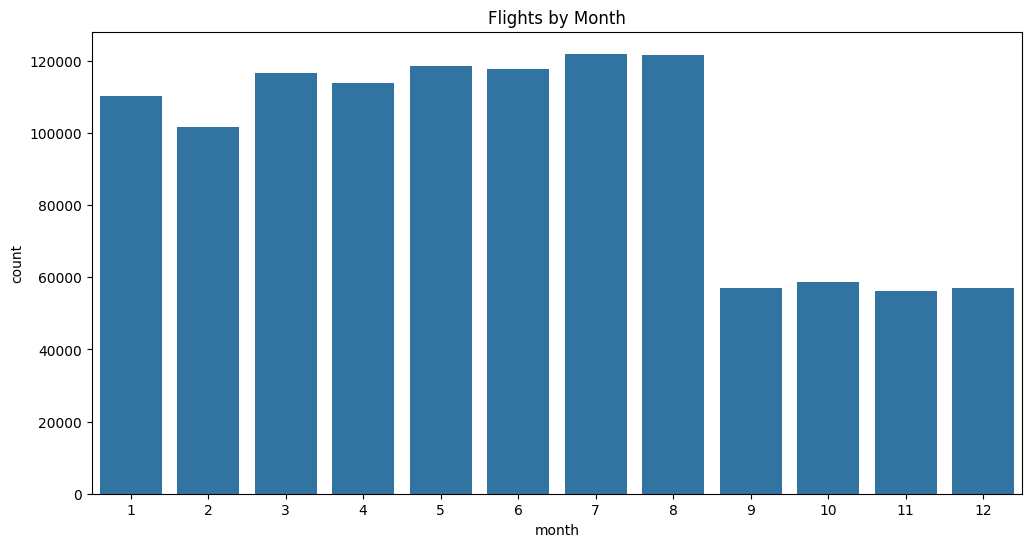

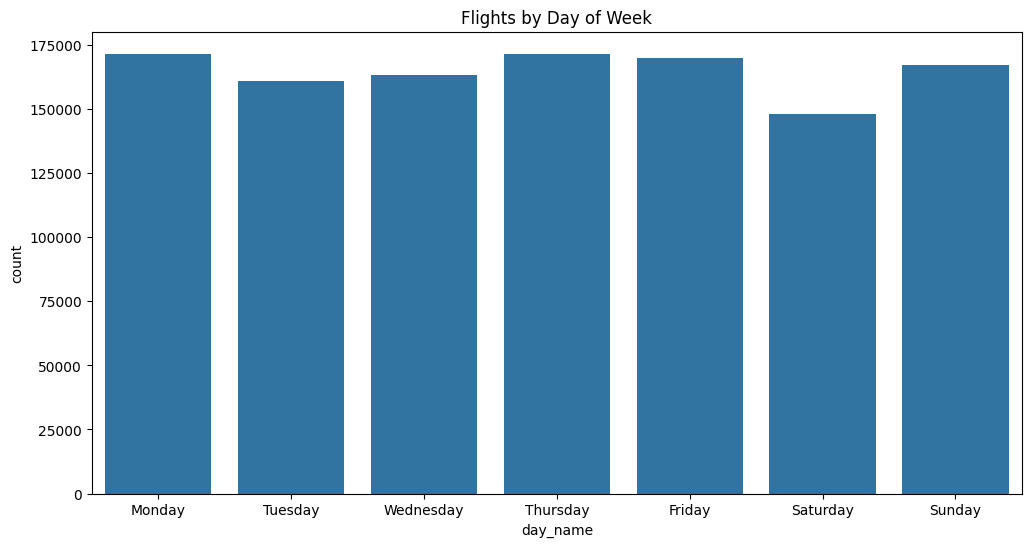

In [55]:
# Month distribution
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df)
plt.title("Flights by Month")
plt.show()

# Day of week distribution
plt.figure(figsize=(12,6))
sns.countplot(x='day_name', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Flights by Day of Week")
plt.show()

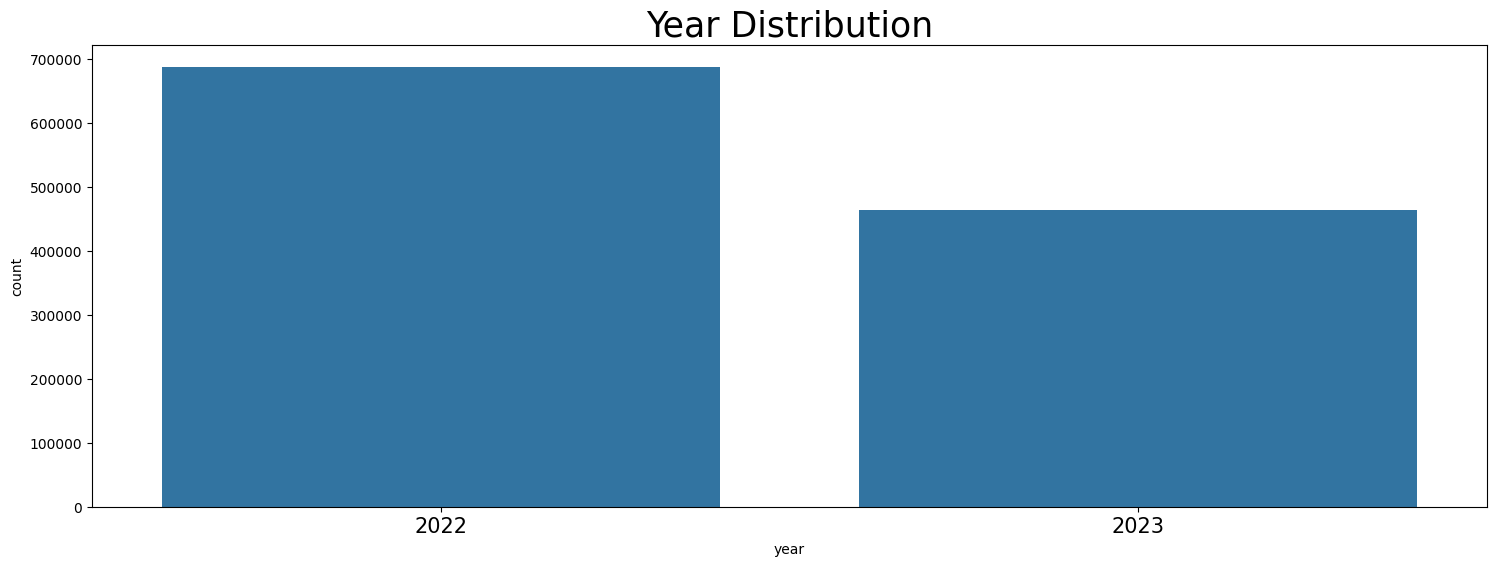

In [56]:
plt.figure(figsize=(18,6))
sns.countplot(x='year', data=df)
plt.title('Year Distribution', size=25)
plt.xticks(size=15)
plt.show()


Flights are distributed fairly evenly among the months, but there is a slight decline at the beginning of the year in the month of __January__ and __February__

#### Market share of each Airline(`carrier`)

Let's see which airline(`carrier`) had most number of flights

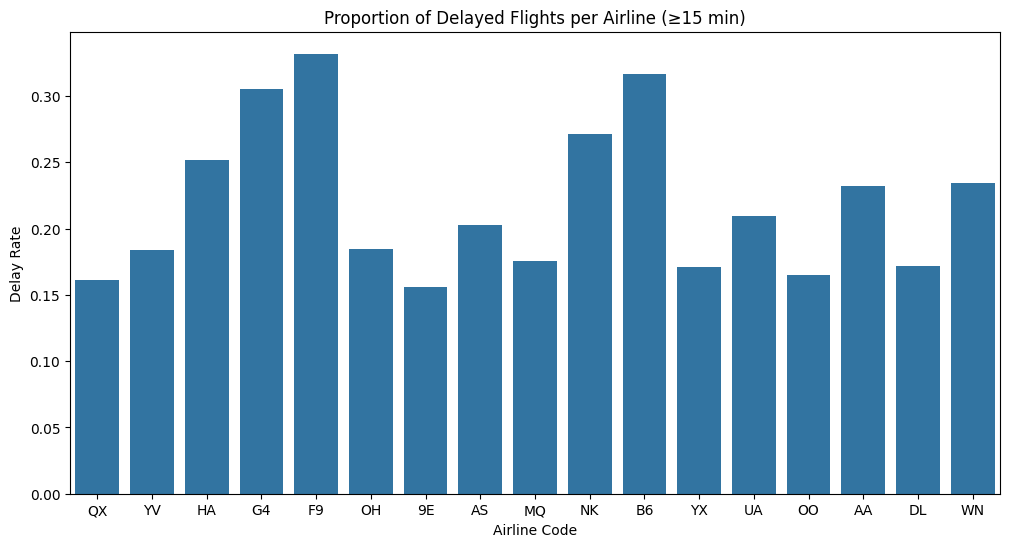

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x=global_stats.index, y=global_stats['mean'])
plt.title("Proportion of Delayed Flights per Airline (≥15 min)")
plt.ylabel("Delay Rate")
plt.xlabel("Airline Code")
plt.show()

From the graph we can predict that the airline named *UA* operated the most with number of flights slightly less then __60k__.<br>
After that *B6* was the one coming second highest in ranking with around __55k__ flights.<br>
`Carrier` *VX*, *FL*, *AS*, *F9*, *HA*, *YV* and *OO* are not distinctly clear with the number of flights. So we'll count their values.

In [58]:
df['AIRLINE_CODE'].value_counts().to_frame()

,count
AIRLINE_CODE,
WN,230123
DL,158391
AA,152967
OO,120505
UA,113804
YX,52997
B6,47068
NK,41196
MQ,40442


In [59]:
global_stats = (
    df.groupby('AIRLINE_CODE')['DELAYED']
      .agg(min='min', max='max', count='count', mean='mean')
      .sort_values('count')
)

global_stats

,min,max,count,mean
AIRLINE_CODE,,,,
QX,0,1,9142,0.161453
YV,0,1,11551,0.183967
HA,0,1,13184,0.251593
G4,0,1,20109,0.305187
F9,0,1,27305,0.331990
OH,0,1,35122,0.184329
9E,0,1,37235,0.155660
AS,0,1,40202,0.202627
MQ,0,1,40442,0.175956


/tmp/ipykernel_6394/374386079.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.stripplot(
/tmp/ipykernel_6394/374386079.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f"{int(x//60):d}h{int(abs(x)%60):02d}m" for x in xticks])


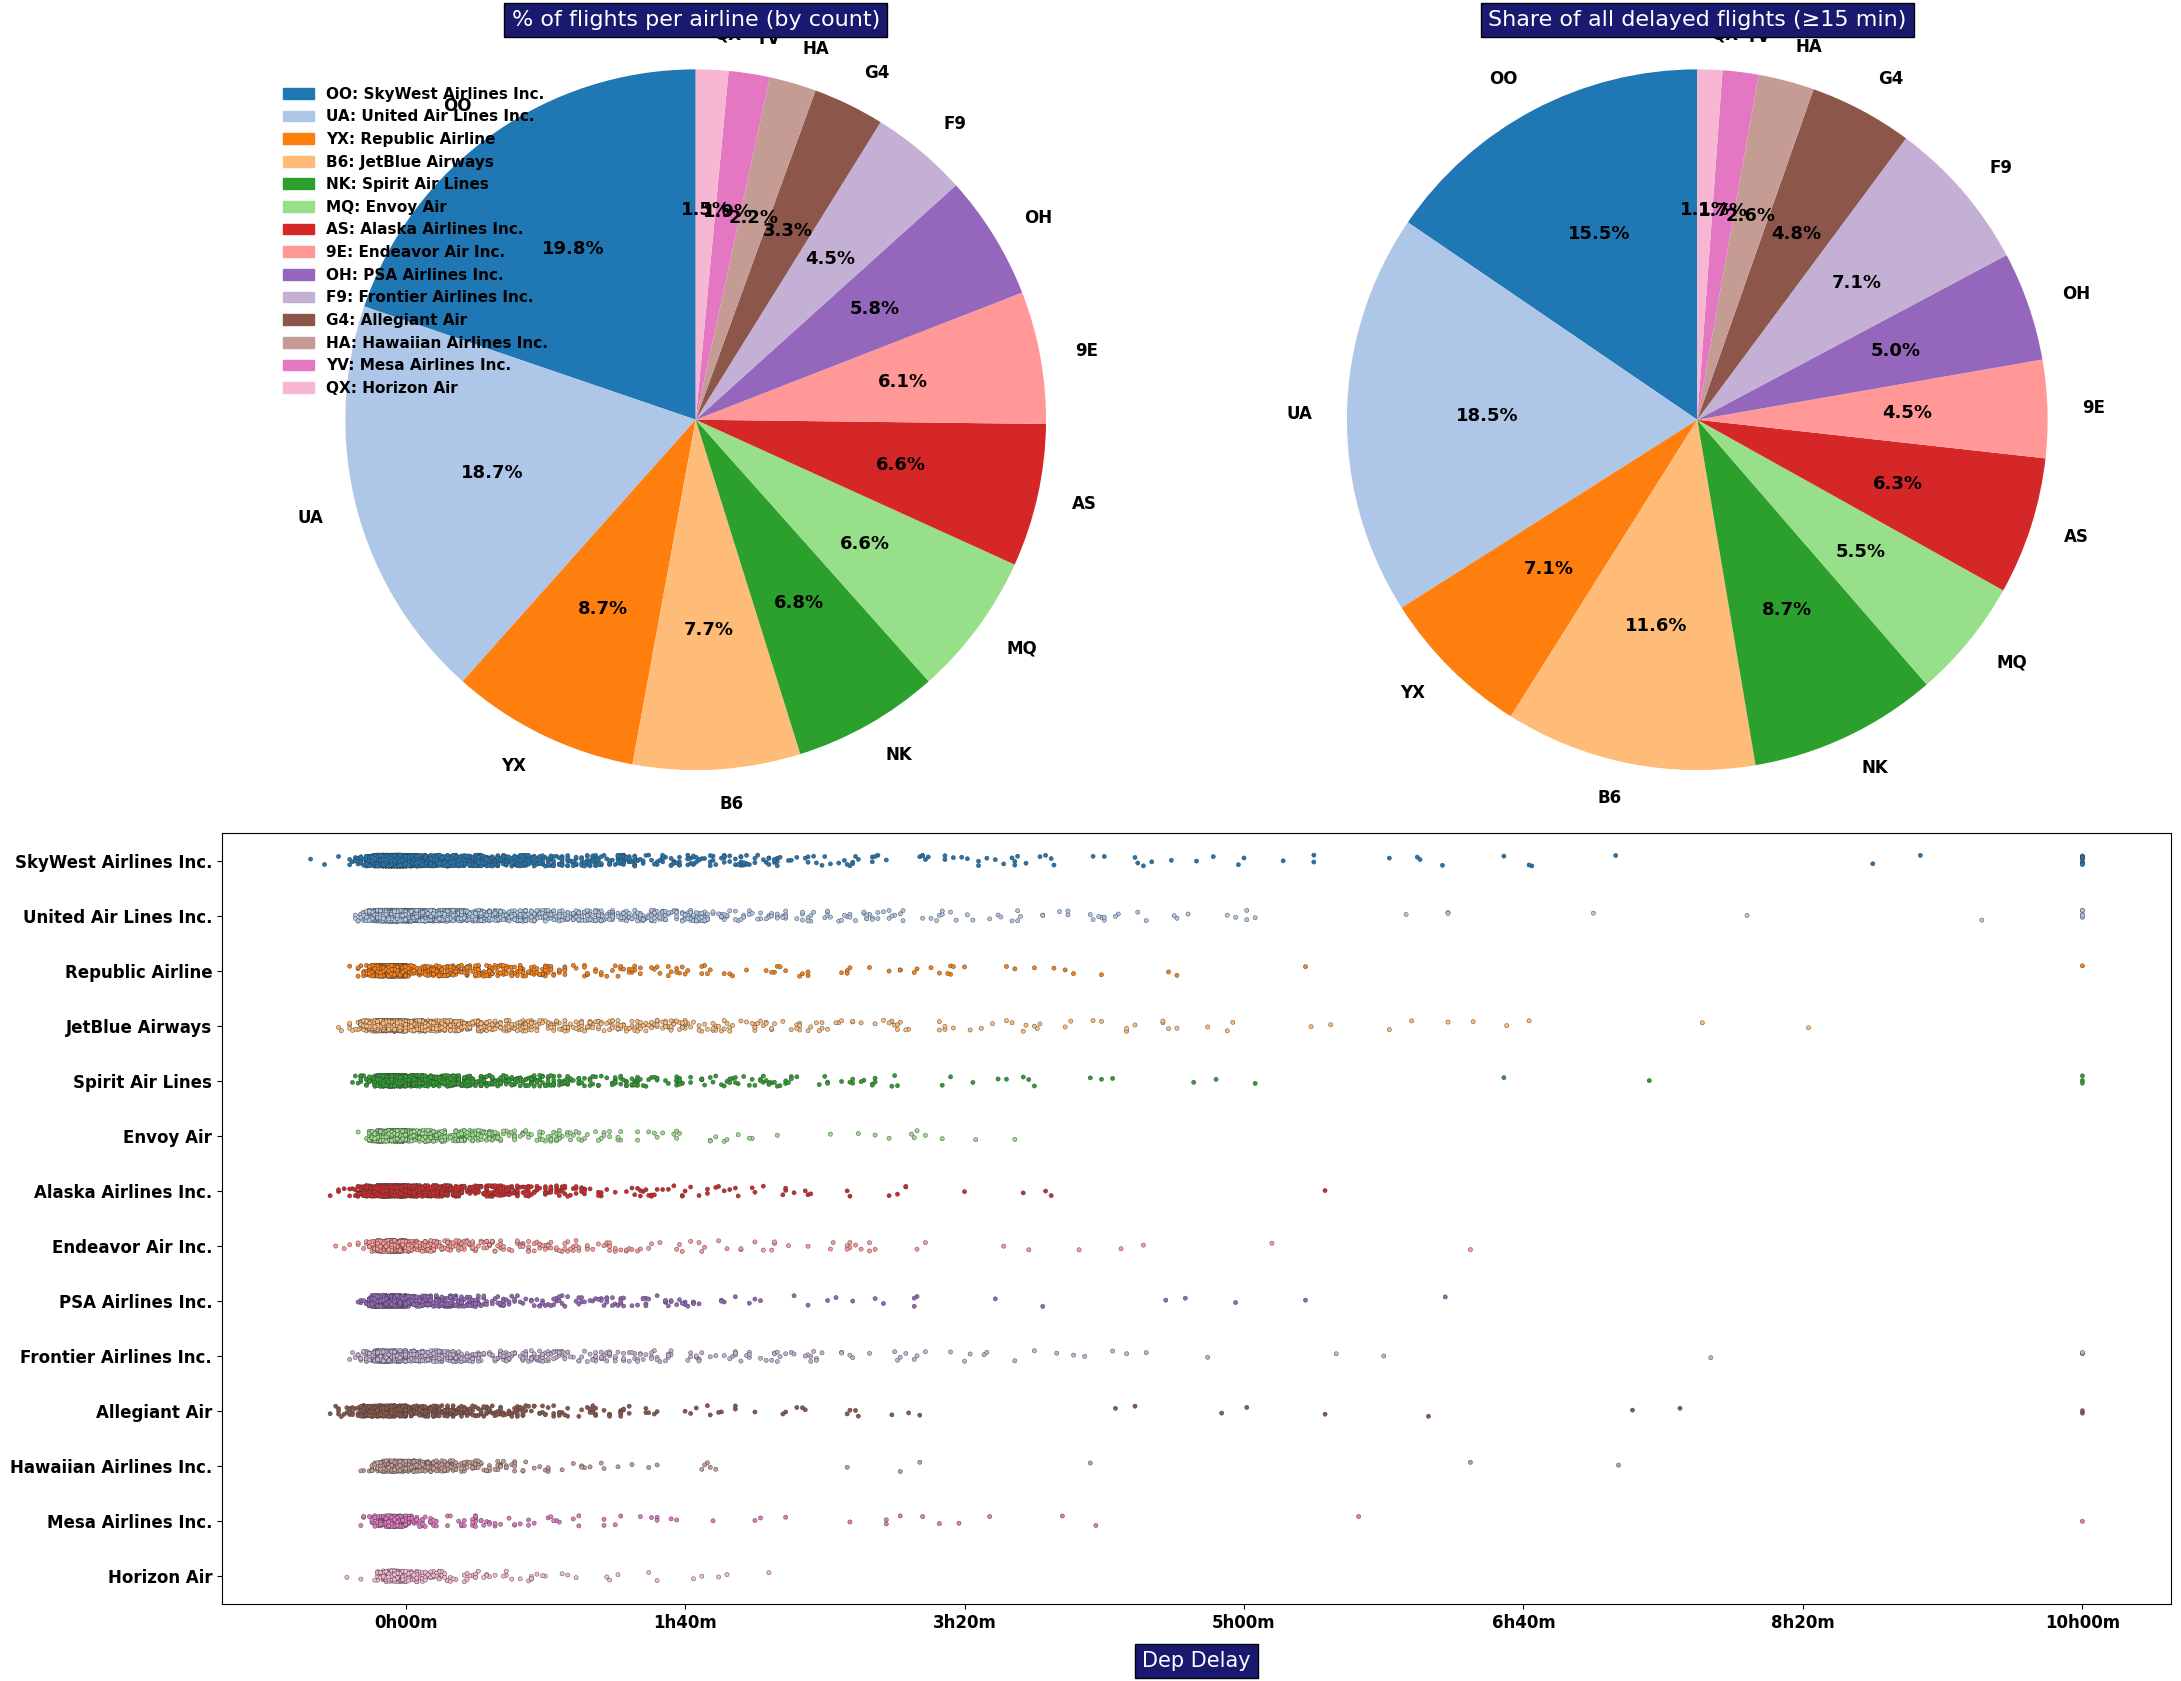

In [68]:
# ===============================
# Graphs on flights, airlines & delays (robust, no external carriers.csv)
# ===============================
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# ---- Ensure we have a valid DELAYED column and global_stats ----
if 'global_stats' not in globals():
    # Auto-detect delay column
    delay_col = None
    for c in ['ARR_DELAY', 'ARR_DELAY_NEW', 'DEP_DELAY', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']:
        if c in df.columns:
            delay_col = c
            break
    if delay_col is None:
        raise ValueError("Could not find a delay column among ARR_DELAY/ARR_DELAY_NEW/DEP_DELAY/DEPARTURE_DELAY/ARRIVAL_DELAY")

    df['DELAYED'] = (df[delay_col] >= 15).astype(int)
    global_stats = (
        df.groupby('AIRLINE_CODE')['DELAYED']
          .agg(min='min', max='max', count='count', mean='mean')
          .sort_values('count', ascending=False)
    )

# ---- Keep ALL airlines dynamically (no hardcoded 14/17) ----
global_stats_top = global_stats.sort_values("count", ascending=False)  # <- use this everywhere

# ---- Build mapping from code -> full airline name from the same df ----
if 'AIRLINE' in df.columns:
    airline_map = (df[['AIRLINE_CODE', 'AIRLINE']]
                   .drop_duplicates()
                   .set_index('AIRLINE_CODE')['AIRLINE']
                   .to_dict())
else:
    # fallback if only codes are available
    airline_map = {code: code for code in global_stats_top.index}

# Labels in the same order as global_stats_top
labels_codes = list(global_stats_top.index)
labels_full  = [airline_map.get(code, code) for code in labels_codes]

# ---- Font settings ----
font = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 13}
mpl.rc('font', **font)

# ---- Color palette ----
try:
    import seaborn as sns
    colors = sns.color_palette('tab20', n_colors=len(labels_full))
except Exception:
    from matplotlib import cm
    colors = [cm.tab20(i / max(1, len(labels_full)-1)) for i in range(len(labels_full))]

# ---- Build figure ----
fig = plt.figure(1, figsize=(22, 17))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# --------------------------------
# Pie chart 1: % of flights by airline
# --------------------------------
sizes_counts = global_stats_top['count'].values
patches, texts, autotexts = ax1.pie(
    sizes_counts,
    labels=labels_codes,  # show codes on the pie
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
for t in texts:
    t.set_fontsize(12)
ax1.axis('equal')
ax1.set_title('% of flights per airline (by count)',
              bbox={'facecolor': 'midnightblue', 'pad': 5}, color='w', fontsize=16)

# Add legend mapping CODE -> FULL NAME
legend_patches = [
    mpatches.Patch(color=colors[i], label=f"{labels_codes[i]}: {labels_full[i]}")
    for i in range(len(labels_codes))
]
ax1.legend(handles=legend_patches, bbox_to_anchor=(0.05, 0.95),
           loc='upper left', fontsize=11, frameon=False)

# --------------------------------
# Pie chart 2: share of all delayed flights
# --------------------------------
counts_delayed = (global_stats_top['mean'] * global_stats_top['count']).values
if counts_delayed.sum() == 0:
    counts_delayed = counts_delayed + 1e-9  # avoid all zeros

patches, texts, autotexts = ax2.pie(
    counts_delayed,
    labels=labels_codes,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
for t in texts:
    t.set_fontsize(12)
ax2.axis('equal')
ax2.set_title('Share of all delayed flights (≥15 min)',
              bbox={'facecolor': 'midnightblue', 'pad': 5}, color='w', fontsize=16)

# --------------------------------
# Strip plot: delay values by airline
# --------------------------------
delay_x = None
for c in ['DEP_DELAY', 'ARR_DELAY', 'ARR_DELAY_NEW', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']:
    if c in df.columns:
        delay_x = c
        break
if delay_x is None:
    raise ValueError("No delay column found for strip plot.")

df_strip = df[df['AIRLINE_CODE'].isin(labels_codes)].copy()
df_strip['AIRLINE_NAME'] = df_strip['AIRLINE_CODE'].map(airline_map).fillna(df_strip['AIRLINE_CODE'])

# Downsample for readability
max_points = 20000
if len(df_strip) > max_points:
    df_strip = df_strip.sample(max_points, random_state=42)

try:
    import seaborn as sns
    ax3 = sns.stripplot(
        y="AIRLINE_NAME", x=delay_x, data=df_strip,
        size=3, palette=colors, linewidth=0.3, jitter=True,
        order=[airline_map.get(c, c) for c in labels_codes]
    )
except Exception:
    # fallback: matplotlib scatter
    import numpy as np
    ax3.clear()
    y_positions = {name: i for i, name in enumerate([airline_map.get(c, c) for c in labels_codes])}
    for i, name in enumerate([airline_map.get(c, c) for c in labels_codes]):
        subset = df_strip[df_strip['AIRLINE_NAME'] == name]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.2
        ax3.scatter(subset[delay_x], [y_positions[name] + j for j in jitter], s=2, alpha=0.6)

    ax3.set_yticks(list(y_positions.values()))
    ax3.set_yticklabels(list(y_positions.keys()))

# cosmetic tweaks
plt.setp(ax3.get_xticklabels(), fontsize=12)
plt.setp(ax3.get_yticklabels(), fontsize=12)

# Format X ticks as hours:minutes if numeric
try:
    xticks = ax3.get_xticks()
    ax3.set_xticklabels([f"{int(x//60):d}h{int(abs(x)%60):02d}m" for x in xticks])
except Exception:
    pass

plt.xlabel(f"{delay_x.replace('_', ' ').title()}",
           fontsize=15, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=14)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
plt.show()


#### Plot Mean Delay of various Airline(`carrier`)

/tmp/ipykernel_6394/1548670088.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='DEP_DELAY', y='AIRLINE', data=mean_delays,
/tmp/ipykernel_6394/1548670088.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='ARR_DELAY', y='AIRLINE', data=mean_delays,


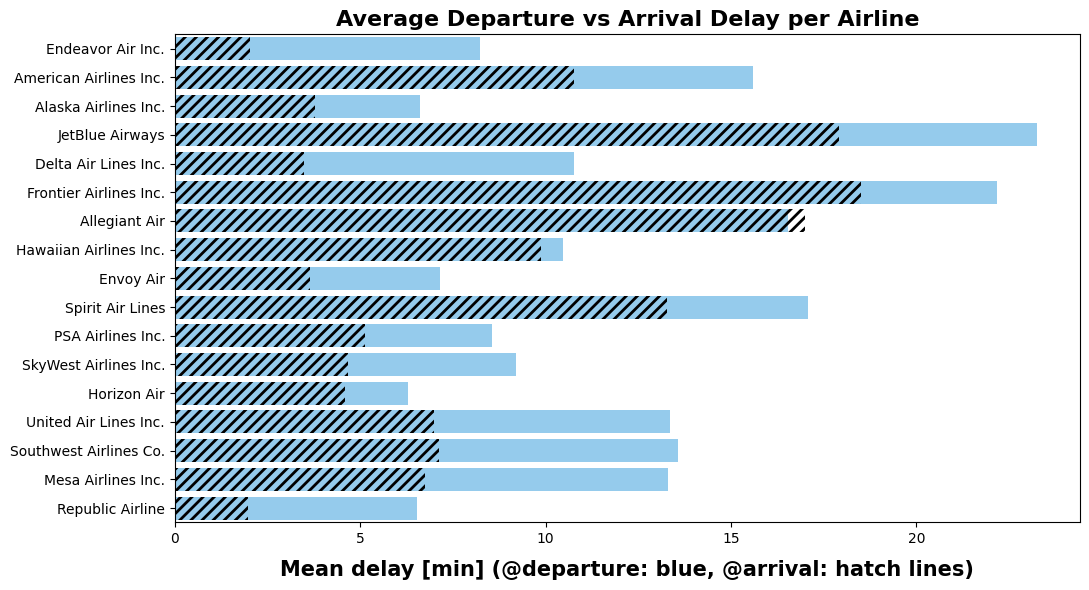

In [69]:
# Group data by airline to compute mean departure and arrival delays
mean_delays = df.groupby('AIRLINE_CODE')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

# Create a mapping: airline code -> airline name
carrier_code = df.set_index('AIRLINE_CODE')['AIRLINE'].to_dict()

# Apply mapping for nicer y-axis labels
mean_delays['AIRLINE'] = mean_delays['AIRLINE_CODE'].map(carrier_code)

# Reset matplotlib defaults
mpl.rc('patch', edgecolor='dimgray', linewidth=1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

# Plot
fig = plt.figure(1, figsize=(11, 6))

# Departure delays (blue bars)
ax = sns.barplot(x='DEP_DELAY', y='AIRLINE', data=mean_delays, 
                 color='lightskyblue', ci=None)

# Arrival delays (red hatch bars)
ax = sns.barplot(x='ARR_DELAY', y='AIRLINE', data=mean_delays, 
                 color='r', hatch='///', alpha=0.0, ci=None)

# Styling
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)",
           fontsize=15, weight='bold', labelpad=10)
plt.title("Average Departure vs Arrival Delay per Airline", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


5 major carriers in US with their Mean Delay:
- __American Airlines- AA__
- __Delta Air Lines- DL__
- __Frontier Airlines- F9__
- __Hawaiian Airlines- HA__
- __JetBlue- B6__

/tmp/ipykernel_6394/3855047245.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='DEP_DELAY', y='AIRLINE_CODE', data=subset,
/tmp/ipykernel_6394/3855047245.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='ARR_DELAY', y='AIRLINE_CODE', data=subset,
/tmp/ipykernel_6394/3855047245.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


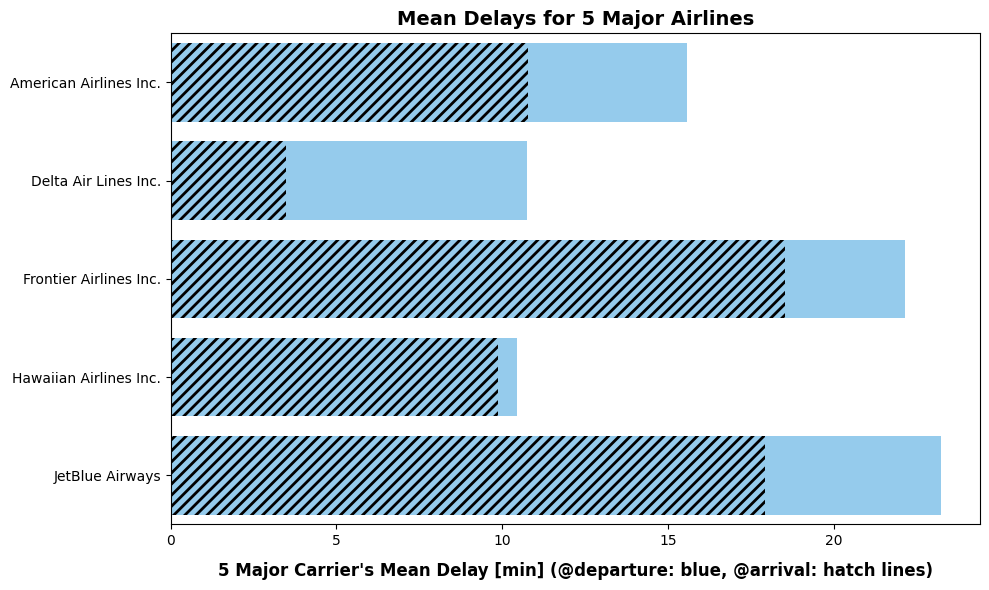

In [70]:
# Pre-aggregate mean delays by airline
mean_delays = df.groupby('AIRLINE_CODE')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

# Mapping: code -> name (from df itself, not external carriers.csv)
carrier_code = df.set_index('AIRLINE_CODE')['AIRLINE'].to_dict()
mean_delays['AIRLINE'] = mean_delays['AIRLINE_CODE'].map(carrier_code)

# Choose 5 major carriers
major_carriers = ['AA', 'DL', 'F9', 'HA', 'B6']
subset = mean_delays[mean_delays['AIRLINE_CODE'].isin(major_carriers)]

# Reset matplotlib styles
mpl.rc('patch', edgecolor='dimgray', linewidth=1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize=(10, 6))

# Departure delays (blue bars)
ax = sns.barplot(x='DEP_DELAY', y='AIRLINE_CODE', data=subset,
                 order=major_carriers, color='lightskyblue', ci=None)

# Arrival delays (red hatch bars)
ax = sns.barplot(x='ARR_DELAY', y='AIRLINE_CODE', data=subset,
                 order=major_carriers, color='r', hatch='///', alpha=0.0, ci=None)

# Replace codes with full airline names
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)

# Labels
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)",
           fontsize=12, weight='bold', labelpad=10)
plt.title("Mean Delays for 5 Major Airlines", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### Plotting the Market Share of the Airports(`origin`) of New York 

In [74]:
df['ORIGIN'].value_counts().to_frame()


,count
ORIGIN,
ATL,55262
DFW,47348
DEN,47012
ORD,43907
LAX,32899
CLT,32333
LAS,30551
SEA,28699
LGA,28628


In [75]:
df['ORIGIN'].shape

(1151343,)

|origin|airport|
|-|-|
|EWR|Newark Liberty International Airport|
|JFK|John F. Kennedy International Airport|
|LGA|LaGuardia Airport|

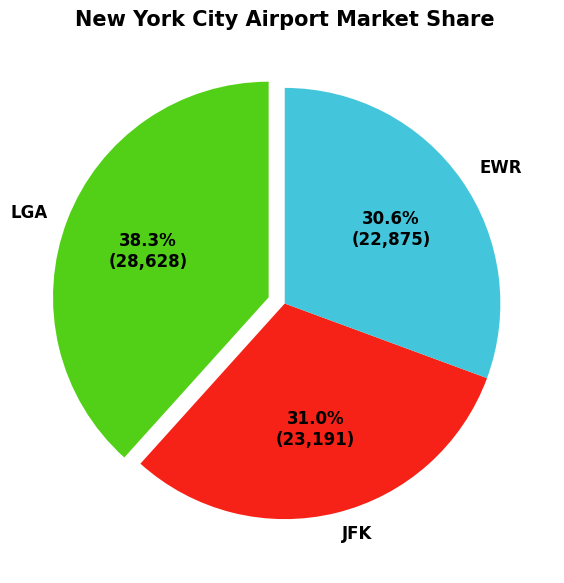

In [80]:
# Filter for only New York airports
nyc_airports = df[df['ORIGIN'].isin(['JFK', 'LGA', 'EWR'])]
airport_counts = nyc_airports['ORIGIN'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))

colors = ['#52D017', '#F62217', '#43C6DB']  # green, red, blue
explode = [0.08 if i == airport_counts.idxmax() else 0 for i in airport_counts.index]

ax.pie(
    airport_counts,
    labels=airport_counts.index,
    explode=explode,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(airport_counts)/100):,})',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

ax.set_title("New York City Airport Market Share", fontsize=15, weight='bold')
plt.show()


<Figure size 1200x600 with 0 Axes>

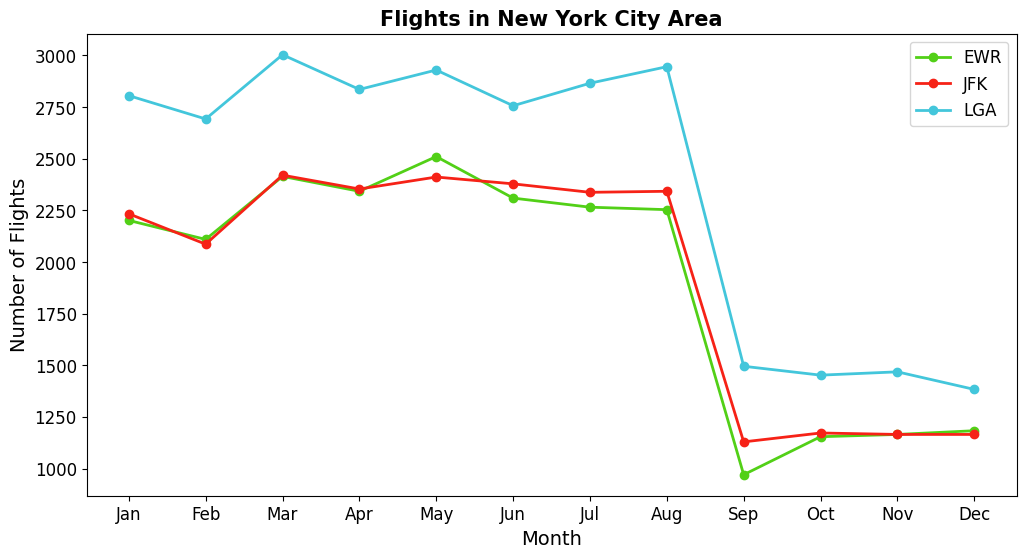

In [82]:
plt.figure(figsize=(12,6))

# Group by month and count flights for each airport
ewr = df[df['ORIGIN'] == 'EWR'].groupby('month').size()
jfk = df[df['ORIGIN'] == 'JFK'].groupby('month').size()
lga = df[df['ORIGIN'] == 'LGA'].groupby('month').size()

plt.plot(ewr.index, ewr.values, marker='o', color='#52D017', linewidth=2)
plt.plot(jfk.index, jfk.values, marker='o', color='#F62217', linewidth=2)
plt.plot(lga.index, lga.values, marker='o', color='#43C6DB', linewidth=2)

plt.title("Flights in New York City Area", fontsize=15, weight='bold')
plt.xticks(range(1, 13), labels=[
    "Jan","Feb","Mar","Apr","May","Jun",
    "Jul","Aug","Sep","Oct","Nov","Dec"
], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.legend(['EWR', 'JFK', 'LGA'], fontsize=12)

plt.show()


## Modelling

In [83]:
def map_labels(delays):
    if delays > 15:
        return 1
    else:
        return 0

df['delayed'] = ((df['dep_delay'].map(map_labels) + df['arr_delay'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)


delayed
0    0.752275
1    0.247725
Name: proportion, dtype: float64

In [84]:
df.head(20)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED,dep_time,dep_delay,arr_time,arr_delay,year,month,day_of_week,day_name,delayed
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,NaN,0,235.0,236,189,1399,0.0,0.0,0.0,0.0,0.0,0,2114,-6,2310,-5,2022,11,5,Saturday,0
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,NaN,0,118.0,112,87,680,0.0,0.0,0.0,0.0,0.0,0,1000,6,1252,0,2022,7,4,Friday,0
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,NaN,0,260.0,285,249,1589,0.0,0.0,24.0,0.0,0.0,1,1608,-1,1853,24,2023,3,0,Monday,1
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0,NaN,0,109.0,89,58,399,0.0,0.0,0.0,0.0,0.0,0,1001,-9,1130,-29,2023,6,6,Sunday,0
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0,NaN,0,227.0,219,200,1379,0.0,0.0,0.0,0.0,0.0,0,527,-3,706,-11,2023,2,6,Sunday,0
5,2022-05-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1011,BWI,"Baltimore, MD",BDL,"Hartford, CT",1735,1738.0,3.0,12.0,1750.0,1843.0,3.0,1840,1846.0,6.0,0,NaN,0,65.0,68,53,283,0.0,0.0,0.0,0.0,0.0,0,1738,3,1846,6,2022,5,6,Sunday,0
6,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",803,800.0,-3.0,17.0,817.0,943.0,3.0,1012,946.0,-26.0,0,NaN,0,129.0,106,86,636,0.0,0.0,0.0,0.0,0.0,0,800,-3,946,-26,2022,5,3,Thursday,0
7,2022-11-12,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2706,GRR,"Grand Rapids, MI",MSP,"Minneapolis, MN",730,720.0,-10.0,10.0,730.0,731.0,5.0,806,736.0,-30.0,0,NaN,0,96.0,76,61,408,0.0,0.0,0.0,0.0,0.0,0,720,-10,736,-30,2022,11,5,Saturday,0
8,2022-09-06,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1754,DFW,"Dallas/Fort Worth, TX",PNS,"Pensacola, FL",830,830.0,0.0,19.0,849.0,1016.0,4.0,1014,1020.0,6.0,0,NaN,0,104.0,110,87,604,0.0,0.0,0.0,0.0,0.0,0,830,0,1020,6,2022,9,1,Tuesday,0
9,2022-03-06,JetBlue Airways,JetBlue Airways: B6,B6,20409,406,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",2030,2030.0,0.0,14.0,2044.0,2309.0,11.0,2328,2320.0,-8.0,0,NaN,0,178.0,170,145,1065,0.0,0.0,0.0,0.0,0.0,0,2030,0,2320,-8,2022,3,6,Sunday,0


In [85]:
df.tail(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED,dep_time,dep_delay,arr_time,arr_delay,year,month,day_of_week,day_name,delayed
1151338,2023-05-29,Republic Airline,Republic Airline: YX,YX,20452,4644,PWM,"Portland, ME",DCA,"Washington, DC",550,550.0,0.0,8.0,558.0,718.0,15.0,747,733.0,-14.0,0,NaN,0,117.0,103,80,482,0.0,0.0,0.0,0.0,0.0,0,550,0,733,-14,2023,5,0,Monday,0
1151339,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0,NaN,0,78.0,92,55,311,0.0,0.0,0.0,0.0,0.0,0,824,-1,856,13,2023,7,2,Wednesday,0
1151340,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0,NaN,0,85.0,71,55,328,0.0,0.0,0.0,0.0,0.0,0,1740,-2,1851,-16,2022,11,6,Sunday,0
1151341,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0,NaN,0,176.0,145,130,977,0.0,0.0,0.0,0.0,0.0,0,1254,-6,1519,-37,2022,11,2,Wednesday,0
1151342,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0,NaN,0,55.0,50,28,151,0.0,36.0,0.0,0.0,0.0,1,615,41,805,36,2022,9,6,Sunday,1


In [87]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'DELAYED', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'year', 'month', 'day_of_week', 'day_name',
       'delayed'],
      dtype='object')

In [88]:
# Final cleanup: drop duplicate / leakage features
columns_to_remove = [
    'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
    'sched_arr_time', 'arr_delay', 'flight', 'tailnum',
    'air_time', 'distance', 'hour', 'minute', 'time_hour'
]

# drop only if the column exists
df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)

print("Remaining columns after final cleanup:\n", df.columns.tolist())
print("Shape:", df.shape)


Remaining columns after final cleanup:
 ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAYED', 'year', 'month', 'day_of_week', 'day_name', 'delayed']
Shape: (1151343, 38)


In [89]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DELAYED,year,month,day_of_week,day_name,delayed
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,NaN,0,235.0,236,189,1399,0.0,0.0,0.0,0.0,0.0,0,2022,11,5,Saturday,0
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,NaN,0,118.0,112,87,680,0.0,0.0,0.0,0.0,0.0,0,2022,7,4,Friday,0
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,NaN,0,260.0,285,249,1589,0.0,0.0,24.0,0.0,0.0,1,2023,3,0,Monday,1
3,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0,NaN,0,109.0,89,58,399,0.0,0.0,0.0,0.0,0.0,0,2023,6,6,Sunday,0
4,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0,NaN,0,227.0,219,200,1379,0.0,0.0,0.0,0.0,0.0,0,2023,2,6,Sunday,0


In [90]:
df['delayed'].value_counts().to_frame()

,count
delayed,
0,866127
1,285216


In [92]:
df['DEST'].value_counts().to_frame()

,count
DEST,
ATL,55401
DFW,47338
DEN,47199
ORD,44336
LAX,32923
CLT,32659
LAS,30511
SEA,28807
PHX,28589


In [33]:
#df_filtered = df[df['dest'].isin(["LEX","TVC","MYR","CHO","BZN","JAC","PSP","EYW","HDN","MTJ","SBN","ANC"])]

In [34]:
#print(df_filtered.head(15))

In [35]:
#print(df_filtered.shape)

In [36]:
#df.drop(df[df['dest'].isin(["LEX","TVC","MYR","CHO","BZN","JAC","PSP","EYW","HDN","MTJ","SBN","ANC"])].index, inplace = True , axis = 0)

In [37]:
#print(df.shape)

In [38]:
#df['delayed'].value_counts().to_frame()

In [93]:
saving_data = df.to_csv("Data/Processed_data15.csv", index = False)